[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/scalar_quantization/deadzone.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/scalar_quantization/deadzone.ipynb)

# Gray Image compression Using a Deadzone Quantizer

**Deadzone quantizers should be applied to signed data centered at 0!**

Notice that if the input image is unsigned, does not make sense to use a deadzone quantizer because we need to center the pixel intensity values on 0 by substracting -128. This means that the values close to 128 (the closeness depends on the quantization step size) will be more severely quantized by the deadzone. 

In [1]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [2]:
%%bash
if [ -d "$HOME/repos/scalar_quantization" ]; then
    cd $HOME/repos/scalar_quantization
    echo "$HOME/repos/scalar_quantization ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/scalar_quantization.git
fi

/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.


In [3]:
%%bash
if [ -d "$HOME/repos/MRVC" ]; then
    cd $HOME/repos/MRVC
    echo "$HOME/repos/MRVC ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/Sistemas-Multimedia/MRVC.git
fi

/home/vruiz/repos/MRVC ... 
Ya está actualizado.


In [4]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

/home/vruiz/repos/image_IO ... 
Ya está actualizado.


In [5]:
!ln -sf ~/MRVC/src/logging_config.py .
!ln -sf ~/repos/scalar_quantization/quantization.py .
!ln -sf ~/repos/scalar_quantization/deadzone_quantization.py .
!ln -sf ~/repos/scalar_quantization/distortion.py .
!ln -sf ~/repos/scalar_quantization/information.py .
!ln -sf ~/repos/image_IO/image_1.py .
!ln -sf ~/repos/image_IO/logging_config.py .

In [6]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib
    import matplotlib.pyplot as plt
    import matplotlib.axes as ax
    #plt.rcParams['text.usetex'] = True
    #plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
%matplotlib inline

try:
    import scipy
except:
    !pip install scipy

try:
    import cv2
except:
    !pip install opencv-python
    !pip install opencv-python-headless # Binder compatibility
#    import cv2

try:
    import skimage
except:
    !pip install scikit-image
    import skimage
    
try:
    import colored
except:
    !pip install colored
#    import colored

import pylab
import math
import numpy as np
from scipy import signal
import cv2
import os
import deadzone_quantization as deadzone
import distortion
#import image_3 as RGB_image
import image_1 as gray_image
import colored
import information

## Configuration

In [7]:
# Prefix of the RGB image to be quantized.

home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_bw/"
!ls -l {fn}

quantizer = deadzone.Deadzone_Quantizer

Q_steps = [2**i for i in range(7, -1, -1)] # Quantization steps (simulating bit-plane encoding)
print(Q_steps)

#RGB_image.write = RGB_image.debug_write # faster
#RGB_image.write = RGB_image.write # higher compression

gray_image.write = gray_image.debug_write # faster
#gray_image.write = gray_image.write # higher compression

total 148
-rw-r--r-- 1 vruiz vruiz 151199 feb 18 22:33 000.png
[128, 64, 32, 16, 8, 4, 2, 1]


## Read the image and show it

[image_1.py:62 print_stats() INFO] max=245 min=25 avg=124.05046081542969


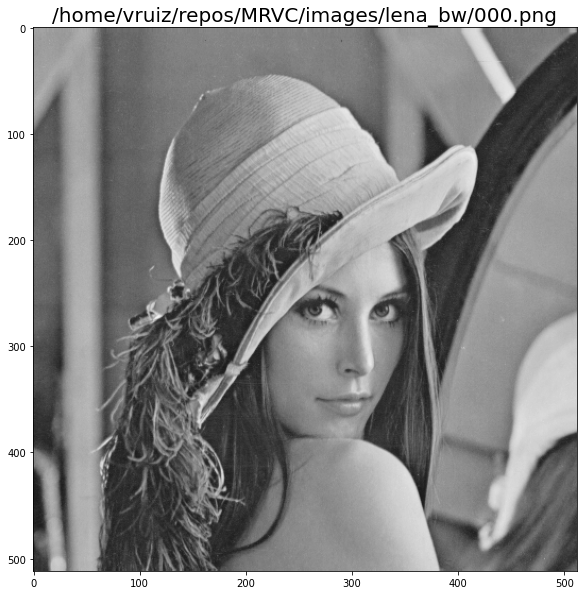

In [8]:
img = gray_image.read(fn, 0).astype(np.int16) # 8 bits/components is not sufficient to shift the components to [-128, 127]
gray_image.show(img, fn + "000.png")

## Show some quantizations

In [9]:
QS = 128 # Quantization Step

In [10]:
Q = quantizer(Q_step=QS, min_val=0, max_val=255)
print(Q.get_decision_levels())
print(Q.get_representation_levels())

[  0 127 255]
[  0 128]


/home/vruiz/repos/Sistemas-Multimedia.github.io/contents/gray_SQ/image_1.py:55: RuntimeWarning: invalid value encountered in true_divide
  return (img - min_component) / max_min_component
[image_1.py:62 print_stats() INFO] max=0 min=0 avg=0.0
[image_1.py:62 print_stats() INFO] max=128 min=128 avg=128.0


Used quantization indexes: [0]
MSE = 2305.5748748779297
SSIM = 0.0
entropy = 0


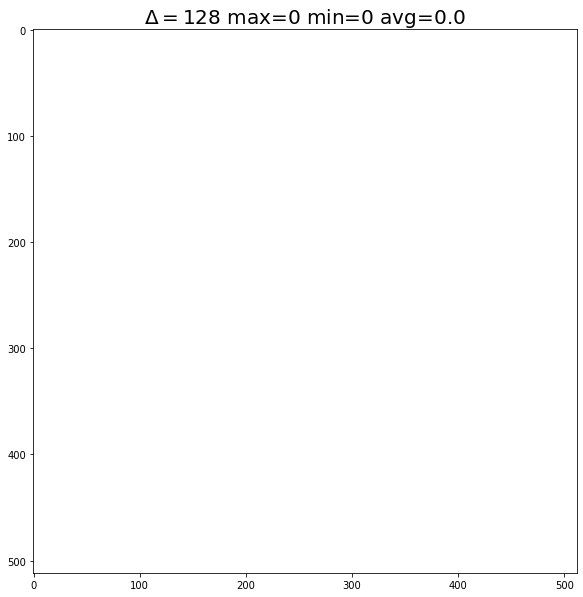

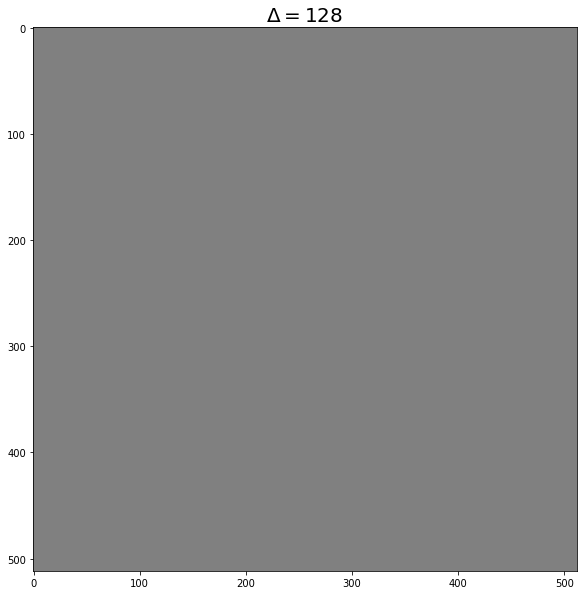

In [11]:
y, k = Q.quan_dequan(img.astype(np.int16) - 128)
print("Used quantization indexes:", np.unique(k))
gray_image.show_normalized(k, f"$\\Delta={QS}$")
gray_image.show(y + 128, f"$\\Delta={QS}$")
print("MSE =", distortion.MSE(img, y + 128))
print("SSIM =", distortion.SSIM(img, y + 128))
print("entropy =", information.entropy((k + 128).flatten()))

In [12]:
QS = 64 # Quantization Step

In [13]:
Q = quantizer(Q_step=QS, min_val=0, max_val=255)
print(Q.get_decision_levels())
print(Q.get_representation_levels())

[  0  63 127 191 255]
[  0  64 128 192]


[image_1.py:62 print_stats() INFO] max=1 min=-1 avg=-0.07221221923828125
[image_1.py:62 print_stats() INFO] max=192 min=64 avg=123.37841796875


Used quantization indexes: [-1  0  1]
MSE = 778.9425506591797
SSIM = 0.4873988512015695
entropy = 1.0700335277459005


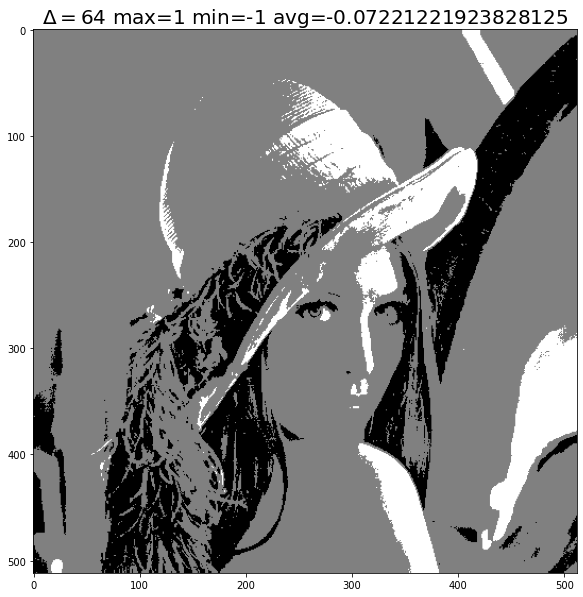

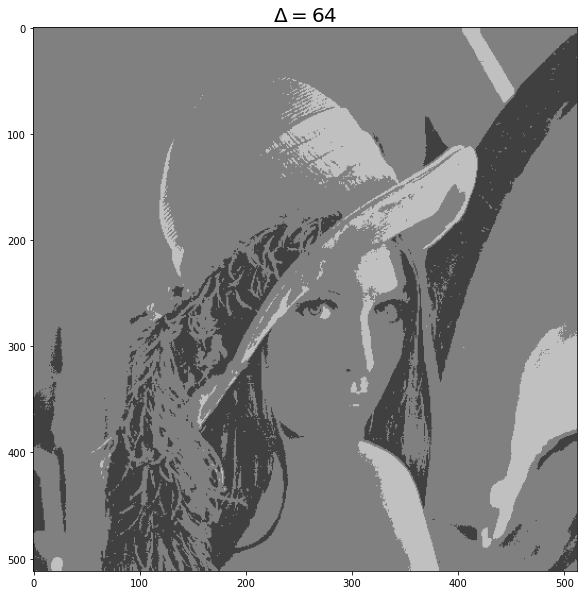

In [14]:
y, k = Q.quan_dequan(img.astype(np.int16) - 128)
print("Used quantization indexes:", np.unique(k))
gray_image.show_normalized(k, f"$\\Delta={QS}$")
gray_image.show(y + 128, f"$\\Delta={QS}$")
print("MSE =", distortion.MSE(img, y + 128))
print("SSIM =", distortion.SSIM(img, y + 128))
print("entropy =", information.entropy((k + 128).flatten()))

## RD curve

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) uint8 len=919 max=128 min=128



Quantization indexes:  [128]
q_step=128, rate=0.028045654296875 bits/pixel, distortion=  48.0


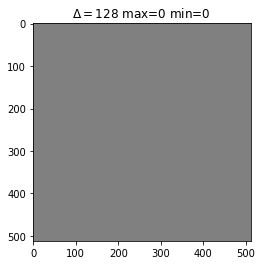


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) uint8 len=12869 max=129 min=127


q_step= 64, rate=0.392730712890625 bits/pixel, distortion=  27.9


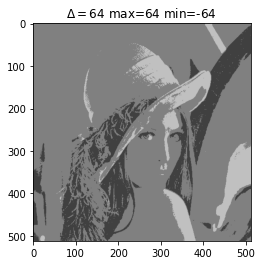

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) uint8 len=26164 max=131 min=125



Quantization indexes:  [125 126 127 128 129 130 131]
q_step= 32, rate=0.7984619140625 bits/pixel, distortion=  17.1


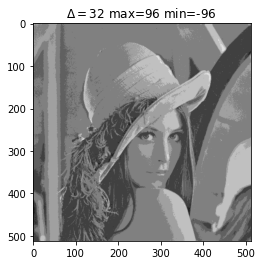


Quantization indexes:  [122 123 124 125 126 127 128 129 130 131 132 133 134 135]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) uint8 len=47152 max=135 min=122


q_step= 16, rate=1.43896484375 bits/pixel, distortion=   8.6


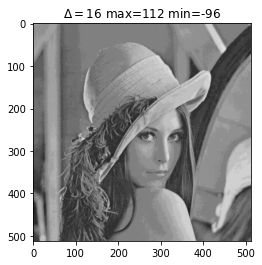


Quantization indexes:  [116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) uint8 len=71248 max=142 min=116


q_step=  8, rate=2.17431640625 bits/pixel, distortion=   4.1


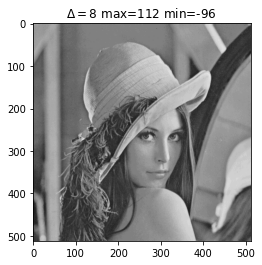


Quantization indexes:  [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) uint8 len=101257 max=157 min=103


q_step=  4, rate=3.090118408203125 bits/pixel, distortion=   1.9


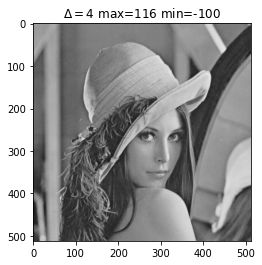

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) uint8 len=132589 max=186 min=77



Quantization indexes:  [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 183 185 186]
q_step=  2, rate=4.046295166015625 bits/pixel, distortion=   0.7


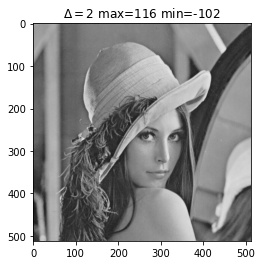

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/1_000.png (512, 512) uint8 len=164565 max=245 min=25



Quantization indexes:  [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 238 242 244 245]
q_step=  1, rate=5.022125244140625 bits/pixel, distortion=   0.0


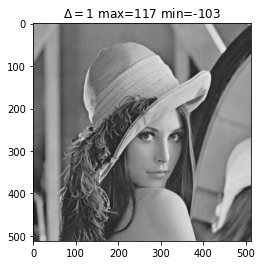

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) uint8 len=12692 max=1 min=0



Quantization indexes:  [0 1]
q_step=128, rate=0.3873291015625 bits/pixel, distortion=  68.9


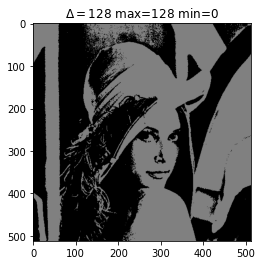


Quantization indexes:  [0 1 2 3]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) uint8 len=21166 max=3 min=0


q_step= 64, rate=0.64593505859375 bits/pixel, distortion=  36.6


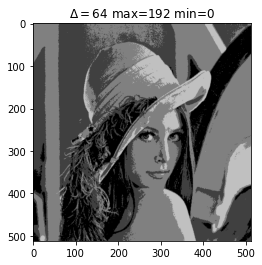


Quantization indexes:  [0 1 2 3 4 5 6 7]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) uint8 len=32226 max=7 min=0


q_step= 32, rate=0.98345947265625 bits/pixel, distortion=  18.0


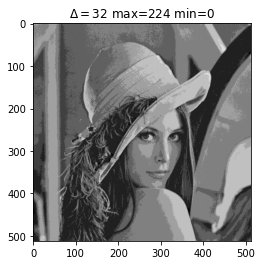


Quantization indexes:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) uint8 len=51293 max=15 min=1


q_step= 16, rate=1.565338134765625 bits/pixel, distortion=   8.8


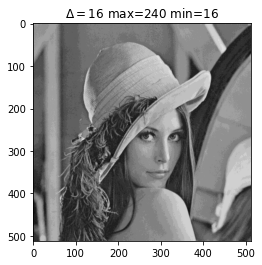


Quantization indexes:  [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) uint8 len=73279 max=30 min=3


q_step=  8, rate=2.236297607421875 bits/pixel, distortion=   4.2


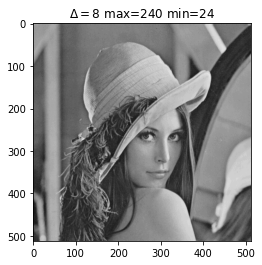


Quantization indexes:  [ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) uint8 len=101419 max=61 min=6


q_step=  4, rate=3.095062255859375 bits/pixel, distortion=   1.9


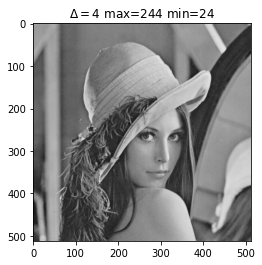

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) uint8 len=132727 max=122 min=12



Quantization indexes:  [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 119 121
 122]
q_step=  2, rate=4.050506591796875 bits/pixel, distortion=   0.7


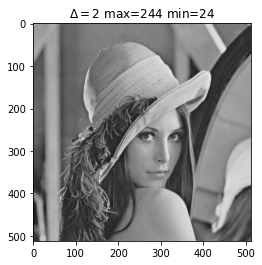

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/1_000.png (512, 512) uint8 len=164565 max=245 min=25



Quantization indexes:  [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 238 242 244 245]
q_step=  1, rate=5.022125244140625 bits/pixel, distortion=   0.0


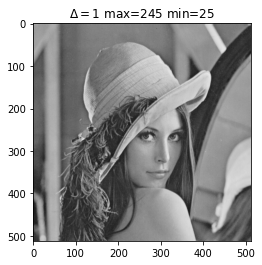

In [15]:
def RD_curve(_img, Q_steps, quantizer):
    img = _img.copy()
    img -= 128
    points = []
    for Q_step in Q_steps:
        Q = quantizer(Q_step=Q_step, min_val=0, max_val=255)
        y, k = Q.quan_dequan(img)
        k = (k + 128).astype(np.uint8) # Only positive components can be written in an PNG file
        print("\nQuantization indexes: ", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(Q_step) + '_', 0)*8/k.size
        _distortion = distortion.RMSE(img, y)
        points.append((rate, _distortion))
        print(f"q_step={Q_step:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
        plt.title(f"$\Delta={Q_step}$ max={y.max()} min={y.min()}")
        plt.imshow(y+128, cmap=plt.cm.gray, vmin=0, vmax=256)
        plt.show()
    return points

def RD_curve2(_img, Q_steps, quantizer):
    img = _img.copy()
    points = []
    for Q_step in Q_steps:
        Q = quantizer(Q_step=Q_step, min_val=0, max_val=255)
        y, k = Q.quan_dequan(img)
        k = k.astype(np.uint8)
        print("\nQuantization indexes: ", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(Q_step) + '_', 0)*8/k.size
        _distortion = distortion.RMSE(img, y)
        points.append((rate, _distortion))
        print(f"q_step={Q_step:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
        plt.title(f"$\Delta={Q_step}$ max={y.max()} min={y.min()}")
        plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
        plt.show()
    return points

RD_points = RD_curve(img, Q_steps, quantizer)
RD_points2 = RD_curve2(img, Q_steps, quantizer)

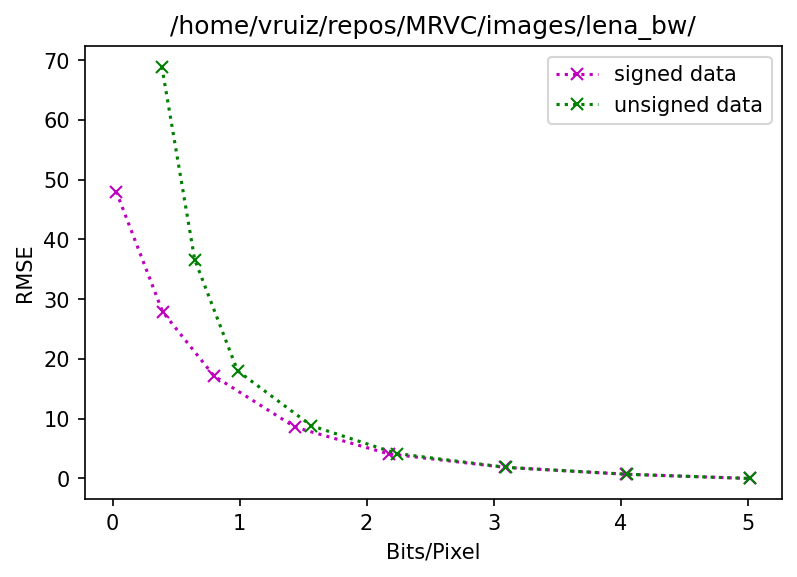

In [16]:
pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points), c='m', marker='x', label=f"signed data", linestyle="dotted")
pylab.plot(*zip(*RD_points2), c='g', marker='x', label=f"unsigned data", linestyle="dotted")
pylab.title(fn)
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

In [17]:
with open("gray_deadzone_SQ.txt", 'w') as f:
    for item in RD_points:
        f.write(f"{item[0]}\t{item[1]}\n")

## What happens if we increase the granuality?
Let's see the effect of using a finer quantization step (size).

In [22]:
Q_steps = range(128, 0, -1)

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/128_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/127_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/126_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/125_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/124_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/123_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/122_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/121_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/120_000.png (512, 512) uint8 len=919 max=128 min=128
[image_1.py:36 debug_write()


Quantization indexes:  [128]
q_step=128, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=127, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=126, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=125, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=124, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=123, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=122, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=121, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=120, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=119, rate=0.028045654296875 bits/pixel, distortion=  48.0


Quantization indexes:  [128]
q_step=118

[image_1.py:36 debug_write() INFO] image_1.write: /tmp/116_000.png (512, 512) uint8 len=929 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/115_000.png (512, 512) uint8 len=929 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/114_000.png (512, 512) uint8 len=935 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/113_000.png (512, 512) uint8 len=935 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/112_000.png (512, 512) uint8 len=935 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/111_000.png (512, 512) uint8 len=935 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/110_000.png (512, 512) uint8 len=937 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/109_000.png (512, 512) uint8 len=937 max=129 min=128
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/108_000.png (512, 512) uint8 len=937 max=129 min=128
[image_1.py:36 debug_write()



Quantization indexes:  [128 129]
q_step=116, rate=0.028350830078125 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=115, rate=0.028350830078125 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=114, rate=0.028533935546875 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=113, rate=0.028533935546875 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=112, rate=0.028533935546875 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=111, rate=0.028533935546875 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=110, rate=0.028594970703125 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=109, rate=0.028594970703125 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=108, rate=0.028594970703125 bits/pixel, distortion=  48.0


Quantization indexes:  [128 129]
q_step=107, rate=0.02862548828125 bits/pixel, distortion=  48.0



[image_1.py:36 debug_write() INFO] image_1.write: /tmp/103_000.png (512, 512) uint8 len=981 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/102_000.png (512, 512) uint8 len=1042 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/101_000.png (512, 512) uint8 len=1136 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/100_000.png (512, 512) uint8 len=1300 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/99_000.png (512, 512) uint8 len=1524 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/98_000.png (512, 512) uint8 len=1710 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/97_000.png (512, 512) uint8 len=2032 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/96_000.png (512, 512) uint8 len=2468 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/95_000.png (512, 512) uint8 len=2941 max=129 min=127




Quantization indexes:  [127 128 129]
q_step=103, rate=0.029937744140625 bits/pixel, distortion=  48.0


Quantization indexes:  [127 128 129]
q_step=102, rate=0.03179931640625 bits/pixel, distortion=  48.0


Quantization indexes:  [127 128 129]
q_step=101, rate=0.03466796875 bits/pixel, distortion=  48.0


Quantization indexes:  [127 128 129]
q_step=100, rate=0.0396728515625 bits/pixel, distortion=  47.9


Quantization indexes:  [127 128 129]
q_step= 99, rate=0.0465087890625 bits/pixel, distortion=  47.9


Quantization indexes:  [127 128 129]
q_step= 98, rate=0.05218505859375 bits/pixel, distortion=  47.8


Quantization indexes:  [127 128 129]
q_step= 97, rate=0.06201171875 bits/pixel, distortion=  47.8


Quantization indexes:  [127 128 129]
q_step= 96, rate=0.0753173828125 bits/pixel, distortion=  47.6


Quantization indexes:  [127 128 129]
q_step= 95, rate=0.089752197265625 bits/pixel, distortion=  47.5


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/94_000.png (512, 512) uint8 len=3408 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/93_000.png (512, 512) uint8 len=4020 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/92_000.png (512, 512) uint8 len=4706 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/91_000.png (512, 512) uint8 len=5487 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/90_000.png (512, 512) uint8 len=6257 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/89_000.png (512, 512) uint8 len=7209 max=129 min=127


q_step= 94, rate=0.10400390625 bits/pixel, distortion=  47.3


Quantization indexes:  [127 128 129]
q_step= 93, rate=0.1226806640625 bits/pixel, distortion=  47.1


Quantization indexes:  [127 128 129]
q_step= 92, rate=0.14361572265625 bits/pixel, distortion=  46.8


Quantization indexes:  [127 128 129]
q_step= 91, rate=0.167449951171875 bits/pixel, distortion=  46.5


Quantization indexes:  [127 128 129]
q_step= 90, rate=0.190948486328125 bits/pixel, distortion=  46.1


Quantization indexes:  [127 128 129]
q_step= 89, rate=0.220001220703125 bits/pixel, distortion=  45.7


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/88_000.png (512, 512) uint8 len=8101 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/87_000.png (512, 512) uint8 len=9194 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/86_000.png (512, 512) uint8 len=10176 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/85_000.png (512, 512) uint8 len=10959 max=129 min=127


q_step= 88, rate=0.247222900390625 bits/pixel, distortion=  45.2


Quantization indexes:  [127 128 129]
q_step= 87, rate=0.28057861328125 bits/pixel, distortion=  44.6


Quantization indexes:  [127 128 129]
q_step= 86, rate=0.310546875 bits/pixel, distortion=  43.9


Quantization indexes:  [127 128 129]
q_step= 85, rate=0.334442138671875 bits/pixel, distortion=  43.2


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/84_000.png (512, 512) uint8 len=11829 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/83_000.png (512, 512) uint8 len=12425 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/82_000.png (512, 512) uint8 len=13145 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/81_000.png (512, 512) uint8 len=13559 max=129 min=127


q_step= 84, rate=0.360992431640625 bits/pixel, distortion=  42.3


Quantization indexes:  [127 128 129]
q_step= 83, rate=0.379180908203125 bits/pixel, distortion=  41.4


Quantization indexes:  [127 128 129]
q_step= 82, rate=0.401153564453125 bits/pixel, distortion=  40.5


Quantization indexes:  [127 128 129]
q_step= 81, rate=0.413787841796875 bits/pixel, distortion=  39.6


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/80_000.png (512, 512) uint8 len=13879 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/79_000.png (512, 512) uint8 len=14063 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/78_000.png (512, 512) uint8 len=14227 max=129 min=127


q_step= 80, rate=0.423553466796875 bits/pixel, distortion=  38.6


Quantization indexes:  [127 128 129]
q_step= 79, rate=0.429168701171875 bits/pixel, distortion=  37.6


Quantization indexes:  [127 128 129]
q_step= 78, rate=0.434173583984375 bits/pixel, distortion=  36.7


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/77_000.png (512, 512) uint8 len=14342 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/76_000.png (512, 512) uint8 len=14358 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/75_000.png (512, 512) uint8 len=14257 max=129 min=127


q_step= 77, rate=0.43768310546875 bits/pixel, distortion=  35.8


Quantization indexes:  [127 128 129]
q_step= 76, rate=0.43817138671875 bits/pixel, distortion=  34.9


Quantization indexes:  [127 128 129]
q_step= 75, rate=0.435089111328125 bits/pixel, distortion=  34.1


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/74_000.png (512, 512) uint8 len=14135 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/73_000.png (512, 512) uint8 len=14004 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/72_000.png (512, 512) uint8 len=13757 max=129 min=127


q_step= 74, rate=0.431365966796875 bits/pixel, distortion=  33.4


Quantization indexes:  [127 128 129]
q_step= 73, rate=0.4273681640625 bits/pixel, distortion=  32.6


Quantization indexes:  [127 128 129]
q_step= 72, rate=0.419830322265625 bits/pixel, distortion=  31.9


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/71_000.png (512, 512) uint8 len=13719 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/70_000.png (512, 512) uint8 len=13530 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/69_000.png (512, 512) uint8 len=13393 max=129 min=127


q_step= 71, rate=0.418670654296875 bits/pixel, distortion=  31.3


Quantization indexes:  [127 128 129]
q_step= 70, rate=0.41290283203125 bits/pixel, distortion=  30.7


Quantization indexes:  [127 128 129]
q_step= 69, rate=0.408721923828125 bits/pixel, distortion=  30.1


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/68_000.png (512, 512) uint8 len=13321 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/67_000.png (512, 512) uint8 len=13175 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/66_000.png (512, 512) uint8 len=13022 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/65_000.png (512, 512) uint8 len=12866 max=129 min=127


q_step= 68, rate=0.406524658203125 bits/pixel, distortion=  29.6


Quantization indexes:  [127 128 129]
q_step= 67, rate=0.402069091796875 bits/pixel, distortion=  29.1


Quantization indexes:  [127 128 129]
q_step= 66, rate=0.39739990234375 bits/pixel, distortion=  28.7


Quantization indexes:  [127 128 129]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/64_000.png (512, 512) uint8 len=12869 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/63_000.png (512, 512) uint8 len=12831 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/62_000.png (512, 512) uint8 len=12815 max=129 min=127


q_step= 65, rate=0.39263916015625 bits/pixel, distortion=  28.3


Quantization indexes:  [127 128 129]
q_step= 64, rate=0.392730712890625 bits/pixel, distortion=  27.9


Quantization indexes:  [127 128 129]
q_step= 63, rate=0.391571044921875 bits/pixel, distortion=  27.6


Quantization indexes:  [127 128 129]
q_step= 62, rate=0.391082763671875 bits/pixel, distortion=  27.3



[image_1.py:36 debug_write() INFO] image_1.write: /tmp/61_000.png (512, 512) uint8 len=12780 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/60_000.png (512, 512) uint8 len=12731 max=129 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/59_000.png (512, 512) uint8 len=12742 max=129 min=127



Quantization indexes:  [127 128 129]
q_step= 61, rate=0.3900146484375 bits/pixel, distortion=  27.1


Quantization indexes:  [127 128 129]
q_step= 60, rate=0.388519287109375 bits/pixel, distortion=  26.9


Quantization indexes:  [127 128 129]
q_step= 59, rate=0.38885498046875 bits/pixel, distortion=  26.7


Quantization indexes:  [127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/58_000.png (512, 512) uint8 len=12871 max=130 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/57_000.png (512, 512) uint8 len=12951 max=130 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/56_000.png (512, 512) uint8 len=13120 max=130 min=127


q_step= 58, rate=0.392791748046875 bits/pixel, distortion=  26.6


Quantization indexes:  [127 128 129 130]
q_step= 57, rate=0.395233154296875 bits/pixel, distortion=  26.4


Quantization indexes:  [127 128 129 130]
q_step= 56, rate=0.400390625 bits/pixel, distortion=  26.3


Quantization indexes:  [127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/55_000.png (512, 512) uint8 len=13309 max=130 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/54_000.png (512, 512) uint8 len=13612 max=130 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/53_000.png (512, 512) uint8 len=13726 max=130 min=127


q_step= 55, rate=0.406158447265625 bits/pixel, distortion=  26.2


Quantization indexes:  [127 128 129 130]
q_step= 54, rate=0.4154052734375 bits/pixel, distortion=  26.1


Quantization indexes:  [127 128 129 130]
q_step= 53, rate=0.41888427734375 bits/pixel, distortion=  26.0


Quantization indexes:  [127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/52_000.png (512, 512) uint8 len=13915 max=130 min=127
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/51_000.png (512, 512) uint8 len=14150 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/50_000.png (512, 512) uint8 len=14567 max=130 min=126


q_step= 52, rate=0.424652099609375 bits/pixel, distortion=  25.9


Quantization indexes:  [126 127 128 129 130]
q_step= 51, rate=0.43182373046875 bits/pixel, distortion=  25.8


Quantization indexes:  [126 127 128 129 130]
q_step= 50, rate=0.444549560546875 bits/pixel, distortion=  25.7


Quantization indexes:  [126 127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/49_000.png (512, 512) uint8 len=14914 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/48_000.png (512, 512) uint8 len=15318 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/47_000.png (512, 512) uint8 len=15918 max=130 min=126


q_step= 49, rate=0.45513916015625 bits/pixel, distortion=  25.6


Quantization indexes:  [126 127 128 129 130]
q_step= 48, rate=0.46746826171875 bits/pixel, distortion=  25.5


Quantization indexes:  [126 127 128 129 130]
q_step= 47, rate=0.48577880859375 bits/pixel, distortion=  25.3


Quantization indexes:  [126 127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/46_000.png (512, 512) uint8 len=16743 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/45_000.png (512, 512) uint8 len=17800 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/44_000.png (512, 512) uint8 len=19139 max=130 min=126


q_step= 46, rate=0.510955810546875 bits/pixel, distortion=  25.1


Quantization indexes:  [126 127 128 129 130]
q_step= 45, rate=0.543212890625 bits/pixel, distortion=  24.8


Quantization indexes:  [126 127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/43_000.png (512, 512) uint8 len=20645 max=130 min=126


q_step= 44, rate=0.584075927734375 bits/pixel, distortion=  24.4


Quantization indexes:  [126 127 128 129 130]
q_step= 43, rate=0.630035400390625 bits/pixel, distortion=  23.8


Quantization indexes:  [126 127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/42_000.png (512, 512) uint8 len=21999 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/41_000.png (512, 512) uint8 len=23149 max=130 min=126


q_step= 42, rate=0.671356201171875 bits/pixel, distortion=  23.2


Quantization indexes:  [126 127 128 129 130]
q_step= 41, rate=0.706451416015625 bits/pixel, distortion=  22.4


Quantization indexes:  [126 127 128 129 130]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/40_000.png (512, 512) uint8 len=23929 max=130 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/39_000.png (512, 512) uint8 len=24315 max=131 min=126


q_step= 40, rate=0.730255126953125 bits/pixel, distortion=  21.5


Quantization indexes:  [126 127 128 129 130 131]
q_step= 39, rate=0.742034912109375 bits/pixel, distortion=  20.7


Quantization indexes:  [126 127 128 129 130 131]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/38_000.png (512, 512) uint8 len=24557 max=131 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/37_000.png (512, 512) uint8 len=24564 max=131 min=126


q_step= 38, rate=0.749420166015625 bits/pixel, distortion=  20.0


Quantization indexes:  [126 127 128 129 130 131]
q_step= 37, rate=0.7496337890625 bits/pixel, distortion=  19.3


Quantization indexes:  [126 127 128 129 130 131]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/36_000.png (512, 512) uint8 len=24632 max=131 min=126
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/35_000.png (512, 512) uint8 len=24766 max=131 min=126


q_step= 36, rate=0.751708984375 bits/pixel, distortion=  18.7


Quantization indexes:  [126 127 128 129 130 131]
q_step= 35, rate=0.75579833984375 bits/pixel, distortion=  18.2


Quantization indexes:  [125 126 127 128 129 130 131]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/34_000.png (512, 512) uint8 len=25091 max=131 min=125
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/33_000.png (512, 512) uint8 len=25537 max=131 min=125


q_step= 34, rate=0.765716552734375 bits/pixel, distortion=  17.8


Quantization indexes:  [125 126 127 128 129 130 131]
q_step= 33, rate=0.779327392578125 bits/pixel, distortion=  17.5


Quantization indexes:  [125 126 127 128 129 130 131]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/32_000.png (512, 512) uint8 len=26164 max=131 min=125
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/31_000.png (512, 512) uint8 len=27070 max=131 min=125


q_step= 32, rate=0.7984619140625 bits/pixel, distortion=  17.1


Quantization indexes:  [125 126 127 128 129 130 131]
q_step= 31, rate=0.82611083984375 bits/pixel, distortion=  16.8


Quantization indexes:  [125 126 127 128 129 130 131]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/30_000.png (512, 512) uint8 len=28440 max=131 min=125


q_step= 30, rate=0.867919921875 bits/pixel, distortion=  16.5


Quantization indexes:  [125 126 127 128 129 130 131 132]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/29_000.png (512, 512) uint8 len=30613 max=132 min=125


q_step= 29, rate=0.934234619140625 bits/pixel, distortion=  16.0


Quantization indexes:  [125 126 127 128 129 130 131 132]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/28_000.png (512, 512) uint8 len=32548 max=132 min=125


q_step= 28, rate=0.9932861328125 bits/pixel, distortion=  15.3


Quantization indexes:  [125 126 127 128 129 130 131 132]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/27_000.png (512, 512) uint8 len=34144 max=132 min=125


q_step= 27, rate=1.0419921875 bits/pixel, distortion=  14.5


Quantization indexes:  [125 126 127 128 129 130 131 132]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/26_000.png (512, 512) uint8 len=34738 max=132 min=125


q_step= 26, rate=1.06011962890625 bits/pixel, distortion=  13.7


Quantization indexes:  [124 125 126 127 128 129 130 131 132]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/25_000.png (512, 512) uint8 len=34681 max=132 min=124


q_step= 25, rate=1.058380126953125 bits/pixel, distortion=  13.0


Quantization indexes:  [124 125 126 127 128 129 130 131 132]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/24_000.png (512, 512) uint8 len=34492 max=132 min=124


q_step= 24, rate=1.0526123046875 bits/pixel, distortion=  12.4


Quantization indexes:  [124 125 126 127 128 129 130 131 132 133]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/23_000.png (512, 512) uint8 len=34799 max=133 min=124


q_step= 23, rate=1.061981201171875 bits/pixel, distortion=  12.0


Quantization indexes:  [124 125 126 127 128 129 130 131 132 133]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/22_000.png (512, 512) uint8 len=35983 max=133 min=124


q_step= 22, rate=1.098114013671875 bits/pixel, distortion=  11.6


Quantization indexes:  [124 125 126 127 128 129 130 131 132 133]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/21_000.png (512, 512) uint8 len=37845 max=133 min=124


q_step= 21, rate=1.154937744140625 bits/pixel, distortion=  11.1


Quantization indexes:  [123 124 125 126 127 128 129 130 131 132 133]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/20_000.png (512, 512) uint8 len=39164 max=133 min=123


q_step= 20, rate=1.1951904296875 bits/pixel, distortion=  10.5


Quantization indexes:  [123 124 125 126 127 128 129 130 131 132 133 134]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/19_000.png (512, 512) uint8 len=40251 max=134 min=123


q_step= 19, rate=1.228363037109375 bits/pixel, distortion=  10.0


Quantization indexes:  [123 124 125 126 127 128 129 130 131 132 133 134]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/18_000.png (512, 512) uint8 len=41878 max=134 min=123


q_step= 18, rate=1.27801513671875 bits/pixel, distortion=   9.7


Quantization indexes:  [122 123 124 125 126 127 128 129 130 131 132 133 134]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/17_000.png (512, 512) uint8 len=44699 max=134 min=122


q_step= 17, rate=1.364105224609375 bits/pixel, distortion=   9.2


Quantization indexes:  [122 123 124 125 126 127 128 129 130 131 132 133 134 135]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/16_000.png (512, 512) uint8 len=47152 max=135 min=122


q_step= 16, rate=1.43896484375 bits/pixel, distortion=   8.6


Quantization indexes:  [122 123 124 125 126 127 128 129 130 131 132 133 134 135]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/15_000.png (512, 512) uint8 len=48885 max=135 min=122


q_step= 15, rate=1.491851806640625 bits/pixel, distortion=   8.0


Quantization indexes:  [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/14_000.png (512, 512) uint8 len=51397 max=136 min=121


q_step= 14, rate=1.568511962890625 bits/pixel, distortion=   7.4


Quantization indexes:  [121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/13_000.png (512, 512) uint8 len=53746 max=137 min=121


q_step= 13, rate=1.64019775390625 bits/pixel, distortion=   6.8


Quantization indexes:  [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/12_000.png (512, 512) uint8 len=55982 max=137 min=120


q_step= 12, rate=1.70843505859375 bits/pixel, distortion=   6.3


Quantization indexes:  [119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/11_000.png (512, 512) uint8 len=59046 max=138 min=119


q_step= 11, rate=1.80194091796875 bits/pixel, distortion=   5.8


Quantization indexes:  [118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/10_000.png (512, 512) uint8 len=62495 max=139 min=118


q_step= 10, rate=1.907196044921875 bits/pixel, distortion=   5.2


Quantization indexes:  [117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/9_000.png (512, 512) uint8 len=66827 max=141 min=117


q_step=  9, rate=2.039398193359375 bits/pixel, distortion=   4.7


Quantization indexes:  [116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/8_000.png (512, 512) uint8 len=71248 max=142 min=116


q_step=  8, rate=2.17431640625 bits/pixel, distortion=   4.1


Quantization indexes:  [114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/7_000.png (512, 512) uint8 len=76695 max=144 min=114


q_step=  7, rate=2.340545654296875 bits/pixel, distortion=   3.6


Quantization indexes:  [111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/6_000.png (512, 512) uint8 len=83069 max=147 min=111


q_step=  6, rate=2.535064697265625 bits/pixel, distortion=   3.0


Quantization indexes:  [108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/5_000.png (512, 512) uint8 len=91034 max=151 min=108


q_step=  5, rate=2.77813720703125 bits/pixel, distortion=   2.4


Quantization indexes:  [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157]


[image_1.py:36 debug_write() INFO] image_1.write: /tmp/4_000.png (512, 512) uint8 len=101257 max=157 min=103
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/3_000.png (512, 512) uint8 len=114241 max=167 min=94
[image_1.py:36 debug_write() INFO] image_1.write: /tmp/2_000.png (512, 512) uint8 len=132589 max=186 min=77


q_step=  4, rate=3.090118408203125 bits/pixel, distortion=   1.9


Quantization indexes:  [ 94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166
 167]
q_step=  3, rate=3.486358642578125 bits/pixel, distortion=   1.3


Quantization indexes:  [ 77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 183 185 186]
q_step=  2, rate=4.046295166015625 bits/pixel, distortion=   0.7



[image_1.py:36 debug_write() INFO] image_1.write: /tmp/1_000.png (512, 512) uint8 len=164565 max=245 min=25



Quantization indexes:  [ 25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 238 242 244 245]
q_step=  1, rate=5.022125244140625 bits/pixel, distortion=   0.0



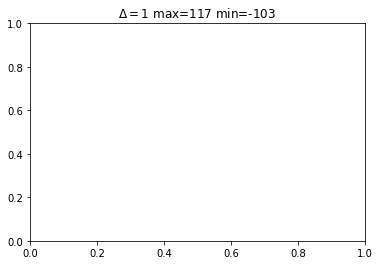

In [29]:
def _(a, cmap, vmin, vmax):
    pass
plt.show = print
plt.imshow = _
RD_points_finer = RD_curve(img, Q_steps, quantizer)

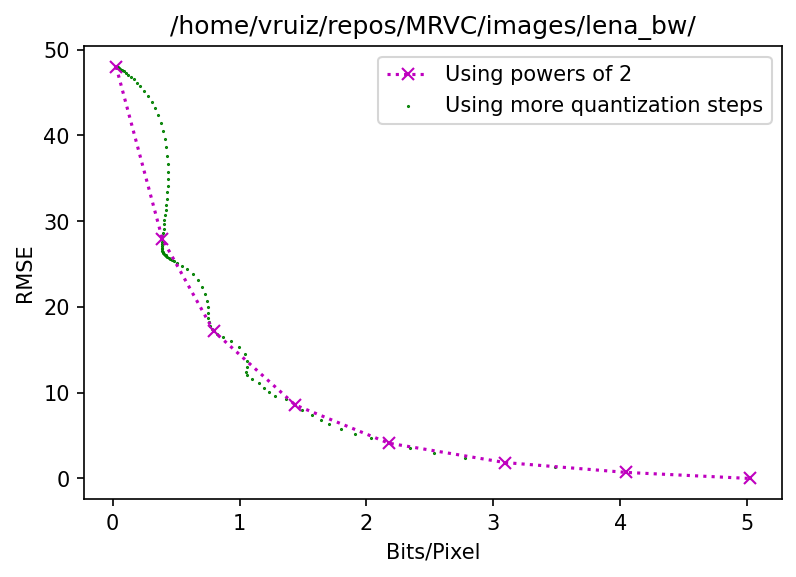

In [33]:
pylab.figure(dpi=150)
pylab.plot(*zip(*RD_points), c='m', marker='x', label=f"Using powers of 2", linestyle="dotted")
pylab.scatter(*zip(*RD_points_finer), c='g', marker='.', label=f"Using more quantization steps", s=1)
pylab.title(fn)
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

As it can be seen:

1. The use of quantization steps that are not powers of 2 can generate some cases in which when we decrease the step, the rate increases.
2. The use of quantization steps that are powers of 2 are on the convex hull of the RD curve (all the points contributes to the convexity of the curve).

In [21]:
import time
while True:
    time.sleep(1)

NameError: name 'true' is not defined